In [1]:
import pandas as pd
import numpy as np
from termcolor import colored
import matplotlib.pyplot as plt
import re

## Segmentation Results

In [2]:
def highlight_phrases(text):
    ret = []
    bracket_match = 0
    for ch in text:
        if ch == '<' or ch =='>':
            bracket_match = (bracket_match + 1) % 4
        elif bracket_match == 0:
            ret.append(ch)
        elif bracket_match == 2:
            ret.append(colored(ch, 'yellow', 'on_red'))
    return "".join(ret)

In [3]:
def visualize_phrases(length=30):
    file = "../results/segmentation.txt"
    with open(file) as f:
        txt = f.readlines()
    for i in range(length):
        print(highlight_phrases(txt[i]))

In [4]:
visualize_phrases(1)

OQL[C++]: Extending C++ with an Object Query Capability.



## Unigram vs Multi-word

In [5]:
# Read in files
unigram_file = '../results/AutoPhrase_single-word.txt'
with open(unigram_file) as f:
        unigram_txt = f.readlines()
multiword_file = '../results/AutoPhrase_multi-words.txt'
with open(multiword_file) as f:
        multiword_txt = f.readlines()

In [6]:
unigram_score = [float(x.split()[0]) for x in unigram_txt]
multiword_score = [float(x.split()[0]) for x in multiword_txt]

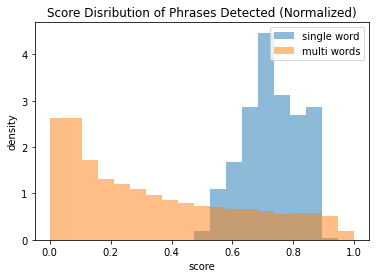

In [7]:
bins = np.linspace(0.0, 1.0, 20)
figure = plt.figure()
plt.hist(unigram_score, bins, alpha=0.5, label='single word', density=True)
plt.hist(multiword_score, bins, alpha=0.5, label='multi words', density=True)
plt.legend(loc='upper right')
plt.title('Score Disribution of Phrases Detected (Normalized)')
plt.xlabel('score')
plt.ylabel('density')
plt.show()

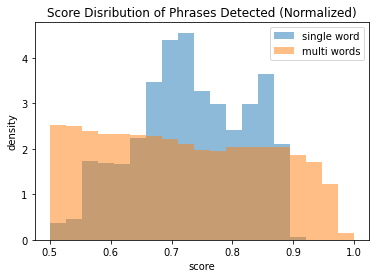

In [8]:
bins = np.linspace(0.5, 1.0, 20)
figure = plt.figure()
plt.hist(unigram_score, bins, alpha=0.5, label='single word', density=True)
plt.hist([x for x in multiword_score if x > 0.5], bins, alpha=0.5, label='multi words', density=True)
plt.legend(loc='upper right')
plt.title('Score Disribution of Phrases Detected (Normalized)')
plt.xlabel('score')
plt.ylabel('density')
plt.show()

## Human Labeling Precision-Recall

In [37]:
def score_text_split(line):
    parts = line.split()
    return " ".join(parts[1:]), float(parts[0])

file = '../results/AutoPhrase.txt'
with open(file) as f:
        txt = f.readlines()
phrases = []
scores = []
for line in txt:
    phrase, score = score_text_split(line)
    phrases.append(phrase)
    scores.append(score)
score_dict = dict(zip(phrases,scores))

In [38]:
# Output randomly selected phrases for human annotation, run only once
# random_phrases = np.random.choice(phrases, 100)
# file = '../results/human_annotation.txt'
# with open(file, 'w') as f:
#         for phrase in random_phrases:
#             f.write(phrase + ", \n")

In [39]:
file = '../results/human_annotation.txt'
with open(file) as f:
    human_labels = f.readlines()

In [40]:
phrases = []
labels = []
for line in human_labels:
    phrase, label = line.split(',')
    phrases.append(phrase)
    labels.append(int(label.split()[0]))
labels = np.array(labels)
scores = np.array([score_dict[x] for x in phrases])

In [46]:
precisions = []
recalls = []
AUC = []
for threshold in np.arange(0.01, 0.95, 0.01):
    prediction = np.where(scores > threshold, 1, 0)
    true_positive = labels * prediction
    precision = true_positive.sum() / (prediction.sum() + 1e-5)
    recall = true_positive.sum() / (labels.sum() + 1e-5)
    precisions.append(precision)
    recalls.append(recall)
    AUC.append(precision * recall)

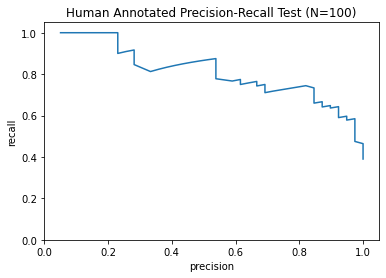

In [47]:
figure = plt.figure()
plt.plot(recalls, precisions)
plt.title('Human Annotated Precision-Recall Test (N=100)')
plt.xlabel('precision')
plt.ylabel('recall')
plt.xlim(0,1.05)
plt.ylim(0,1.05)
plt.show()

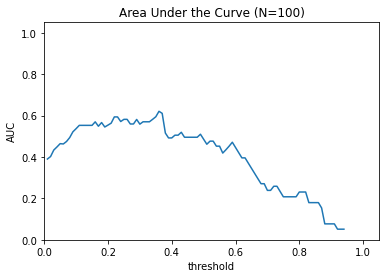

In [48]:
figure = plt.figure()
plt.plot(np.arange(0.01, 0.95, 0.01), AUC)
plt.title('Area Under the Curve (N=100)')
plt.xlabel('threshold')
plt.ylabel('AUC')
plt.xlim(0,1.05)
plt.ylim(0,1.05)
plt.show()